<a href="https://colab.research.google.com/github/JL6270/AlgegiranFireData/blob/main/Group_15_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anlysis of Wildfires

#### MECEE4520 | Data Science for Mechanics
#### Department of Mechanical Engineering
#### Professor Changyao Chen
#### Columbia University | Fall 2023



Submitted on 19th of December 2023

Submitted by Team 15: Yonghao Chen(yc4141), Zhuofei Lin(zl3193), Minghui Zhao(ma2866), Jinfan Li(jl6270), Kristopher Holder (klh2177)


### Introduction
Wildfires are among the most dangerous and costly natural hazards. It is considered a worldwide disaster affecting various aspects of life, environmental health, socio-economic stability, and public health. In recent years, there has been a notable increase in the occurrence of severe wildfires in many parts of the world. This rise is generally believed to be connected to the effects of climate change, which include higher temperatures, prolonged droughts, and changing precipitation patterns. This alarming increase in wildfire frequency and intensity necessitates a reevaluation of current fire management and a robust need for effective wildfire prediction strategies.

Despite various wildfire risk indices that have been formed for this purpose, prediction of wildfire characteristics remains a challenging task as wildfire behavior depends on numerous meteorological factors, topography, and vegetation index. To address this issue, many research efforts have been conducted to monitor, predict, and prevent wildfires using several Artificial Intelligence techniques and strategies such as Big Data, Machine Learning, and Remote Sensing. The latter offers a rich source of satellite images, from which we can retrieve a huge amount of data that can be used to monitor wildfires.

In this paper, we focus on forecasting wildfire occurrences in the forests of British Columbia and Quebec, Canada. Utilizing a dataset from GitHub, accessible at (https://raw.githubusercontent.com/ouladsayadyounes/WildFires/master/WildFires_DataSet.csv), we analyze data concerning fire incidents. This dataset comprises 804 records including 386 fire instances and 418 no_fire instances. Our initial step involves conducting Exploratory Data Analysis (EDA) to generate statistical graphics and plots. These visual tools are crucial for revealing key dataset characteristics and underlying patterns relevant to wildfire occurrences. We then employ two predictive models, Neural Network and Random Forest, to discern the relationships between various features and wildfire incidents. To enhance the efficacy of these models, we undertake hyperparameter tuning. This process involves employing both random search and grid search methods, which are instrumental in fine-tuning the models' parameters. The objective of this tuning is to maximize the performance of our predictive models, ensuring they provide the most accurate forecasts possible for wildfire occurrences in our project scope.


### EDA
The following script performs exploratory data analysis(EDA) on a wildfire dataset. The dataset contains two main features: Normalized Difference Vegetation Index (NDVI) and Land Surface Temperature (LST). The first feature is the Normalized Difference Vegetation Index (NDVI), a dimensionless parameter widely used to gauge the density of live green vegetation **[1]**. NDVI values span from -1 to 1, reflecting the health and vigor of vegetation. Values ranging from -1 to 0 typically signify dead plants or non-living objects, while values from 0 to 1 correspond to living vegetation, with values closer to 1 indicating healthier plants **[2]**. This index serves as a critical tool in understanding vegetation status and health, particularly in the context of wildfire analysis. Land Surface Temperature(LST) represents the radiative skin temperature of the land surface derived from solar radiation, it depends on the vegetation cover and the soil moisture **[1]**. The LST value is calibrated into Kelvin by multiplying a scale factor of 0.2 and then converting it into Celsius. The 'CLASS' column is transformed into a binary format to distinguish between fire and no-fire instances. The script then delves into visualizations to uncover patterns in the dataset. Histograms are generated to depict the distribution of LST and the Normalized Difference Vegetation Index (NDVI), both of which are segmented by fire and no-fire categories. Additionally, it focuses on the subset of data representing fire instances to further explore the distribution of LST within this specific category. The script also creates scatter plots to investigate the relationship between continuous variables such as LST and NDVI with the burned area, providing insights into how these factors correlate with the severity of wildfires. Lastly, a pair plot is used to visually examine the relationships among various numerical predictors in the dataset, highlighting potential correlations and trends in a comprehensive manner.

<ipython-input-1-1a6ed305ce71>:29: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7c847ba1d060> starts with '_'. It is thus excluded from the legend.
  plt.gca().legend(['_', '_', 'Fire', 'No Fire'], prop={'size': 10})
<ipython-input-1-1a6ed305ce71>:29: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7c847ba1c8e0> starts with '_'. It is thus excluded from the legend.
  plt.gca().legend(['_', '_', 'Fire', 'No Fire'], prop={'size': 10})


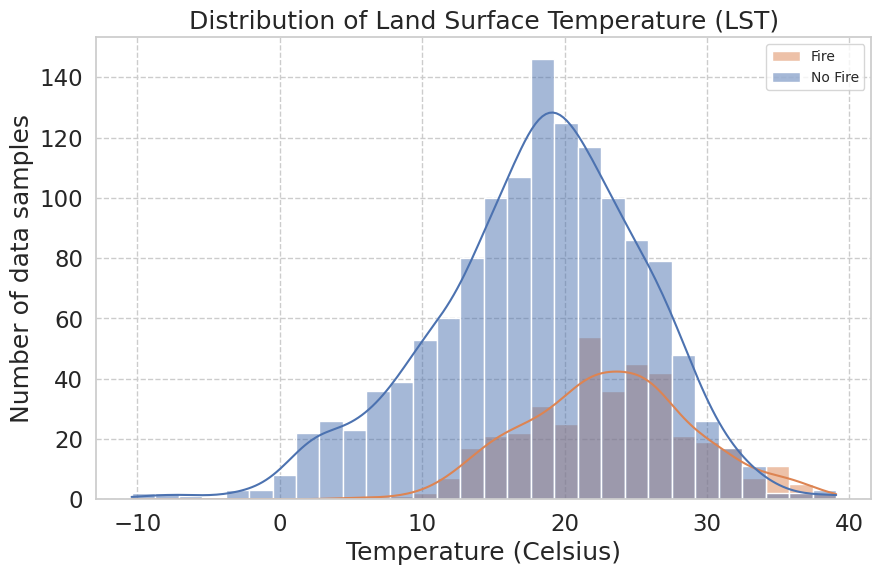

<ipython-input-1-1a6ed305ce71>:38: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7c8476bc45b0> starts with '_'. It is thus excluded from the legend.
  plt.gca().legend(['_', '_', 'Fire', 'No Fire'], prop={'size': 10})
<ipython-input-1-1a6ed305ce71>:38: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7c8476bc7e50> starts with '_'. It is thus excluded from the legend.
  plt.gca().legend(['_', '_', 'Fire', 'No Fire'], prop={'size': 10})


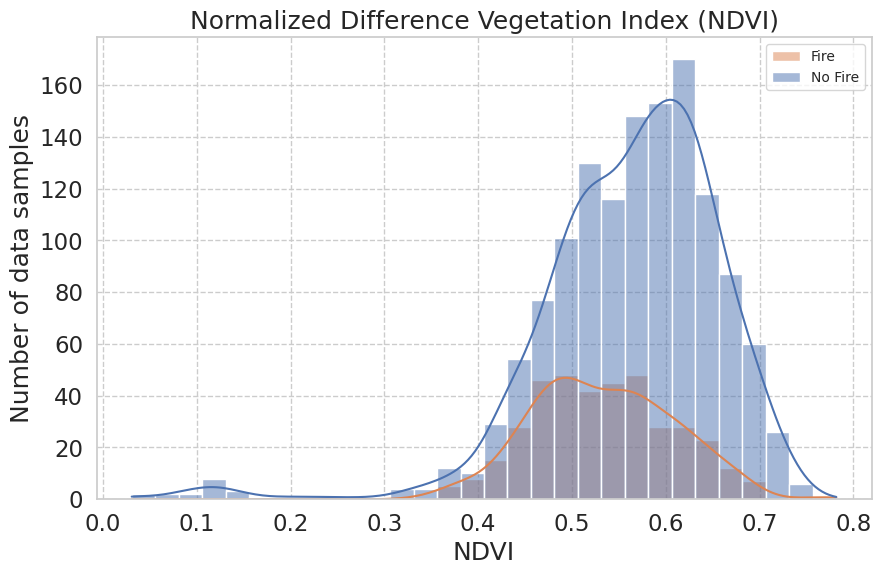

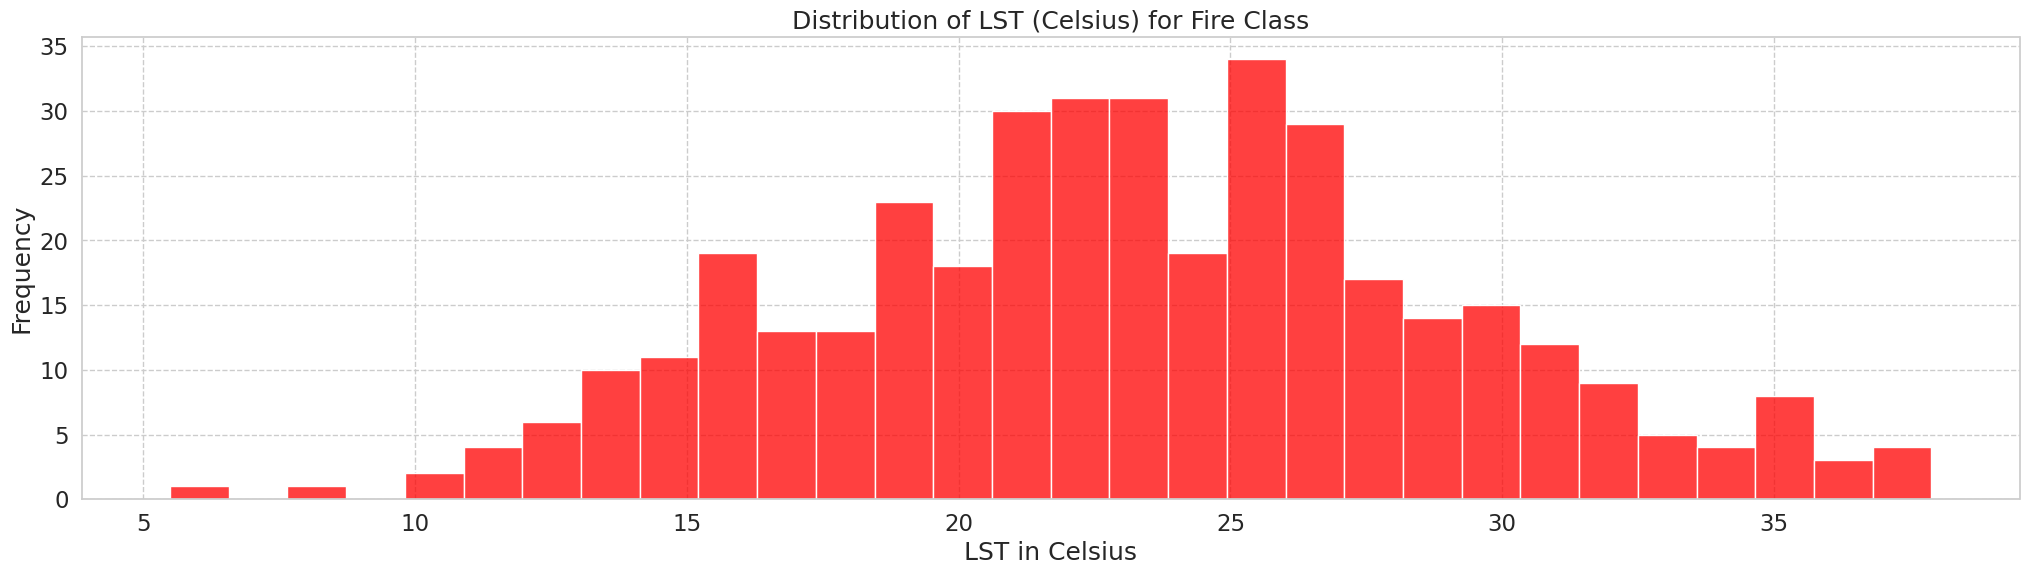

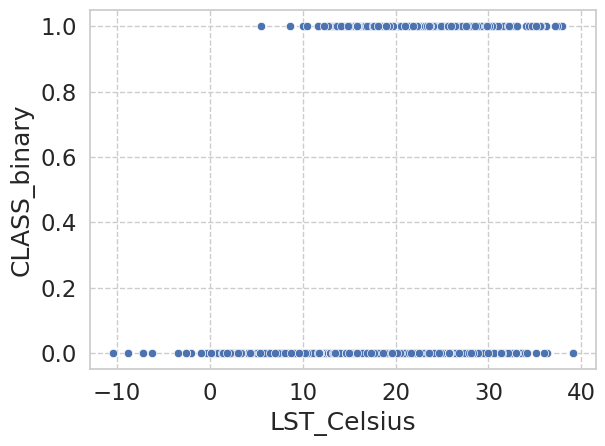

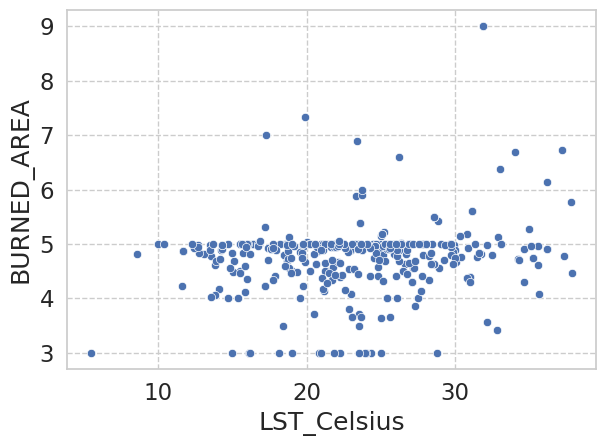

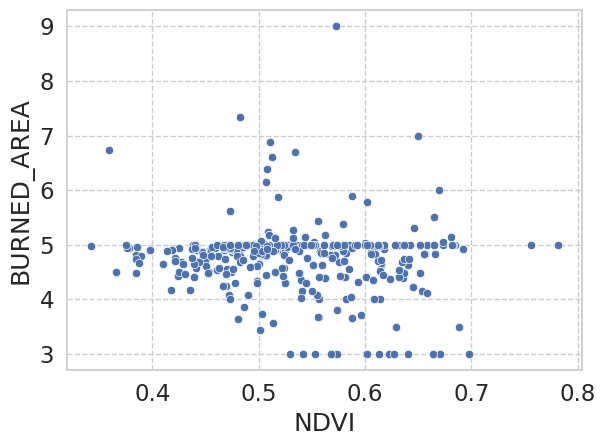

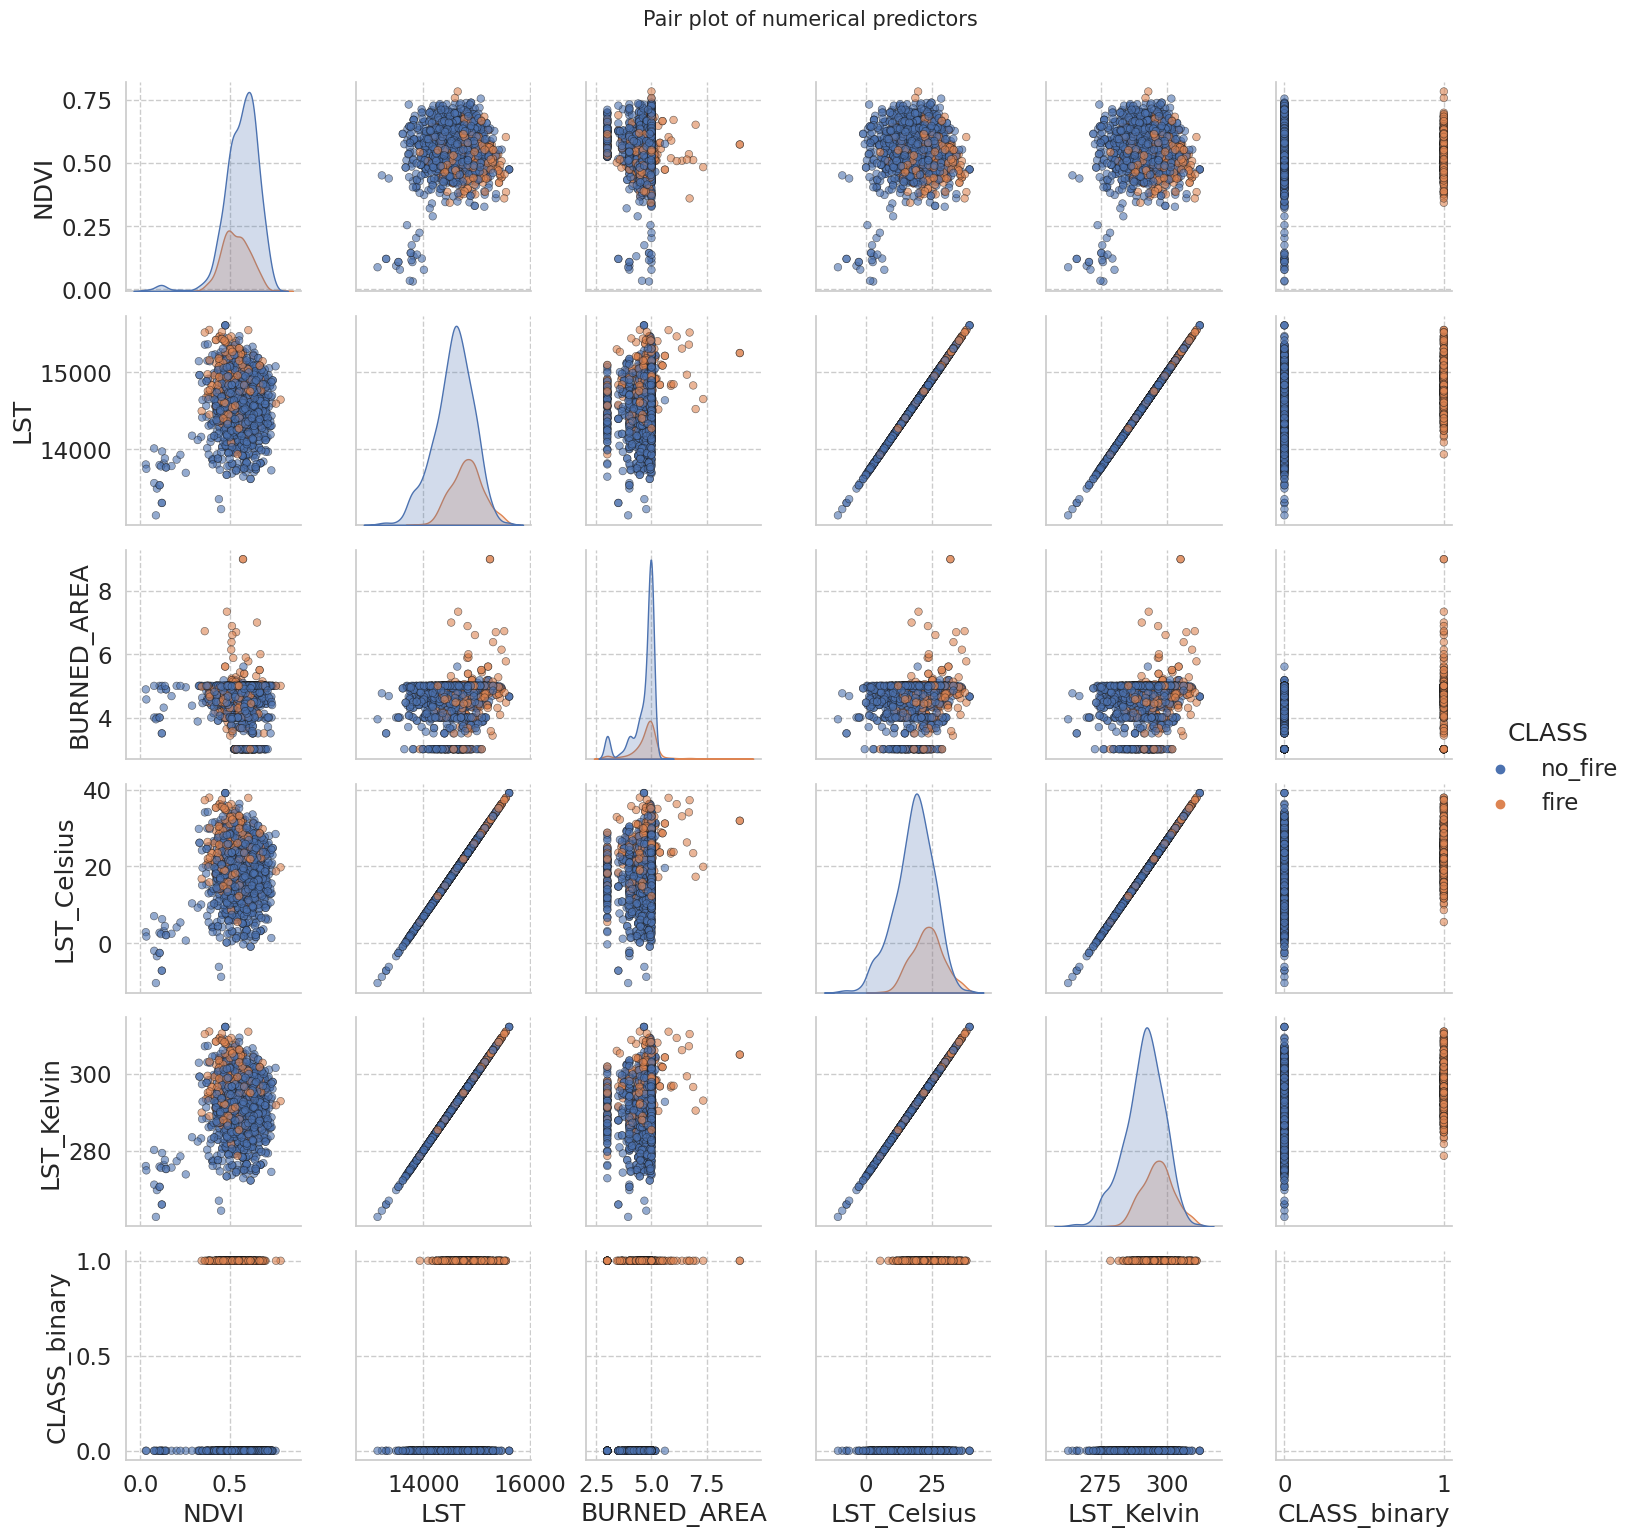

In [1]:
# Import necessary libraries
from typing import List, Tuple, Union
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from tqdm import tqdm

# Set the style and font scale for seaborn plots
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

# Load the data from a URL and preprocess it
data = pd.read_csv("https://raw.githubusercontent.com/ouladsayadyounes/WildFires/master/WildFires_DataSet.csv")

# Convert Land Surface Temperature (LST) from LST to Kelvin and Celsius, create a binary column for fire classification
scale_factor = 0.02
data['LST_Celsius'] = (data['LST'] * scale_factor) - 273.15
data['LST_Kelvin'] = data['LST'] * scale_factor
data['CLASS_binary'] = data['CLASS'].map({'fire': 1, 'no_fire': 0})

# Plot histograms to show the distribution of LST in Celsius, distinguishing between fire and no-fire classes
plt.figure(figsize=(10, 6))
sns.histplot(x="LST_Celsius", data=data, hue='CLASS', bins=30, kde=True)
plt.title('Distribution of Land Surface Temperature (LST)')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Number of data samples')
plt.gca().legend(['_', '_', 'Fire', 'No Fire'], prop={'size': 10})
plt.show()

# Plot histograms for the Normalized Difference Vegetation Index (NDVI), categorized by fire and no-fire classes
plt.figure(figsize=(10, 6))
sns.histplot(x="NDVI", data=data, hue='CLASS', bins=30, kde=True)
plt.title('Normalized Difference Vegetation Index (NDVI)')
plt.xlabel('NDVI')
plt.ylabel('Number of data samples')
plt.gca().legend(['_', '_', 'Fire', 'No Fire'], prop={'size': 10})
plt.show()

# Focus on the subset of data where the class is 'fire'
fire_data = data[data['CLASS'] == 'fire']

# Plot the distribution of LST in Celsius specifically for fire instances
plt.figure(figsize=(25, 6))
sns.histplot(fire_data['LST_Celsius'], color='red', bins=30)
plt.title('Distribution of LST (Celsius) for Fire Class')
plt.xlabel('LST in Celsius')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to show the relationship between LST in Celsius and binary classification of fire
plt.figure()
sns.scatterplot(x="LST_Celsius", y="CLASS_binary", data=data)
plt.tight_layout()

# Exploring correlations by plotting scatter plots of continuous variables against burned area in fire data
continuous_variables = ["LST_Celsius", "NDVI"]
for variable in continuous_variables:
    plt.figure()
    sns.scatterplot(x=variable, y="BURNED_AREA", data=fire_data)
    plt.tight_layout()

# Pair plot to visualize relationships between numerical predictors in the dataset
sns.pairplot(data, hue='CLASS', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k'})
plt.suptitle('Pair plot of numerical predictors', size=15, y=1.03)
plt.show()


Based on the generated image, we can observe the relationships between surface temperature, the Normalized Difference Vegetation Index (NDVI), and the burned area. The scatter plots within the image reveal trends in how these variables are distributed, highlighting distinctions under fire and no-fire conditions. There appears to be a positive correlation between surface temperature and the burned area, suggesting that higher temperatures may correlate with larger burned areas. Conversely, the relationship between NDVI and the burned area seems less pronounced, indicating that vegetation health may not directly determine the severity of a fire. Additionally, when comparing the distributions under fire and no-fire conditions, surface temperatures tend to be higher and NDVI values lower in the presence of fire, potentially reflecting the impact of fires on ground temperature and vegetation health. These observations could provide valuable insights for further analysis and model development.

### Data Initialzation and Training Model Selection


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, balanced_accuracy_score

df = pd.read_csv('https://github.com/ouladsayadyounes/WildFires/raw/master/WildFires_DataSet.csv')
label_encoder = LabelEncoder()
df['CLASS'] = label_encoder.fit_transform(df['CLASS'])
df['LST'] *= 0.02
df['LST'] -= 273.15
df.groupby('CLASS').count()

,NDVI,LST,BURNED_AREA
CLASS,,,
0,386,386,386
1,1327,1327,1327


After normalizing and preprocessing the data, we divided the dataset, allocating 80% for training and the remaining 20% for testing. The study utilized two models: the Multilayer Perceptron (MLP) Classifier and the Random Forest Classifier, both accessed via the Scikit-learn library. The MLP was selected for its ability to capture complex, nonlinear relationships within the data, making it suitable for comprehending the dataset's deep interplays. Additionally, MLP is particularly adept at classification tasks, with a multi-layered structure that allows for capturing complex data patterns and flexibility in adjusting the number of hidden layers. It effectively handles high-dimensional datasets without performance degradation **[3]**. The Random Forest Classifier, in contrast, is effective with high-dimensional data and provides adaptability and deep feature significance evaluations. It is robust against noisy data and capable of handling various data distributions, making solid predictions, especially in the presence of outliers and unbalanced datasets **[4]**. We chose to compare the performance of these two models.

In this initial stage, we trained the model without engaging in model fitting or parameter tuning. The resulting prediction reports, as observed below, revealed a relatively low level of model accuracy. This outcome underscores the importance of fine-tuning and optimizing model parameters to enhance performance and achieve more reliable predictions.

In [ ]:
from sklearn.neural_network import MLPClassifier

# Preparing the data
X = df.drop('CLASS', axis=1)
y = df['CLASS']
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling for normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(21,21,21), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predictions and Evaluation for MLP
y_pred = mlp.predict(X_test)
print("MLPClassifier Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("MLPClassifier Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.ensemble import RandomForestClassifier

# RandomForest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Predictions and Evaluation for Random Forest
y_pred = rfc.predict(X_test)
print("\nRandomForestClassifier Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("RandomForestClassifier Classification Report:\n", classification_report(y_test, y_pred))

c:\Users\s1298\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier Accuracy: 0.6154939587775409
MLPClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.29      0.39       112
           1       0.83      0.95      0.88       402

    accuracy                           0.80       514
   macro avg       0.71      0.62      0.63       514
weighted avg       0.78      0.80      0.77       514


RandomForestClassifier Accuracy: 0.7085110163468373
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.46      0.57       112
           1       0.86      0.95      0.91       402

    accuracy                           0.85       514
   macro avg       0.80      0.71      0.74       514
weighted avg       0.84      0.85      0.83       514



### Hyper parameter tuning
In this section, our focus was on hyperparameter tuning to optimize the performance of our models. Our research indicated that RandomizedSearchCV is typically more efficient and conserves computational time. However, we also noticed that RandomizedSearchCV does not always guarantee optimal results **[5]**. Recognizing the limitations of RandomizedSearchCV, we decided to use both RandomizedSearchCV and GridSearchCV for hyperparameter tuning to enhance the performance of our models. This combined approach was aimed at capitalizing on the strengths of each method to optimize the performance of our models effectively.

The hyperparameter tuning is conducted in two stages. Initially, RandomizedSearchCV is utilized for both models, efficiently exploring a broad range of hyperparameters to identify promising combinations. This approach is particularly effective due to its ability to sample diverse parameter settings, providing a balance between exploring a wide parameter space and focusing on areas with high potential.

Following the initial exploration, GridSearchCV is employed to finely tune the models within the narrowed parameter range identified by RandomizedSearchCV. This step involves an exhaustive search over the specified range, ensuring that the best possible parameter combination is identified for each model. The use of GridSearchCV is crucial for achieving the highest model accuracy, as it meticulously evaluates every possible combination within the targeted hyperparameter space.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
from random import sample

data = pd.read_csv('https://github.com/ouladsayadyounes/WildFires/raw/master/WildFires_DataSet.csv')
X = data.drop('CLASS', axis=1)
y = data['CLASS']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting up the parameter range for RandomizedSearchCV for MLPClassifier
alpha_range = np.logspace(-6, 0, 10000)
random_params_mlpc = {
    'hidden_layer_sizes': [(200, 200), (50, 50, 50), (100, 100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': alpha_range
}

# Setting up the parameter range for RandomizedSearchCV for RandomForestClassifier
random_params_rf = {
    'n_estimators': sample(range(50, 450), 400),
    'max_depth': sample(range(2, 15), 13),
    'min_samples_split': sample(range(2, 15), 13),
    'min_samples_leaf': sample(range(1, 15), 14),
    'max_features': [3]
}

# Initializing the classifiers
mlpc = MLPClassifier(max_iter=300, random_state=42)
rf = RandomForestClassifier(random_state=42)

# Performing Randomized Search for hyperparameter tuning
random_search_mlpc = RandomizedSearchCV(mlpc, random_params_mlpc, n_iter=100, cv=5, n_jobs=-1, random_state=42, verbose=3)
random_search_rf = RandomizedSearchCV(rf, random_params_rf, n_iter=100, cv=5, n_jobs=-1, random_state=42, verbose=3)

print("Randomized search for MLPClassifier...")
random_search_mlpc.fit(X_train_scaled, y_train)
print("Randomized search for RandomForestClassifier...")
random_search_rf.fit(X_train_scaled, y_train)

# Extracting best parameters from Randomized Search
best_params_mlpc = random_search_mlpc.best_params_
best_params_rf = random_search_rf.best_params_

# Setting up parameters for GridSearchCV based on Randomized Search results
wp = 0.12
n = 9
grid_params_mlpc = {
    'hidden_layer_sizes': [best_params_mlpc['hidden_layer_sizes']],
    'activation': [best_params_mlpc['activation']],
    'alpha': best_params_mlpc['alpha'] * (1 + np.linspace(-wp, wp, n))
}
grid_params_rf = {
    'n_estimators': [int(best_params_rf['n_estimators'] * (1 + x)) for x in np.linspace(-wp, wp, n)],
    'max_depth': [int(best_params_rf['max_depth'] + x) for x in range(-2, 3)],
    'min_samples_split': [best_params_rf['min_samples_split'] + x for x in range(-1, 2)],
    'min_samples_leaf': [best_params_rf['min_samples_leaf'] + x for x in range(-1, 2)]
}

# Performing Grid Search for fine-tuning the models
grid_search_mlpc = GridSearchCV(mlpc, grid_params_mlpc, cv=5, n_jobs=-1, verbose=3)
grid_search_rf = GridSearchCV(rf, grid_params_rf, cv=5, n_jobs=-1, verbose=3)

print("Grid search for MLPClassifier...")
grid_search_mlpc.fit(X_train_scaled, y_train)
print("Grid search for RandomForestClassifier...")
grid_search_rf.fit(X_train_scaled, y_train)

joblib.dump(grid_search_mlpc.best_estimator_, 'mlpc_model.joblib')
joblib.dump(grid_search_rf.best_estimator_, 'rf_model.joblib')


The prediction outcomes are presented below. Following the tuning process, there was a noticeable improvement in accuracy compared to previous levels. However,  It should be noted that hyperparameter tuning demands considerable computational resources to effectively converge the model. This requirement results in an increased cost associated with the training process.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
from sklearn.metrics import accuracy_score, classification_report

url = "https://github.com/ouladsayadyounes/WildFires/raw/master/WildFires_DataSet.csv"
data = pd.read_csv(url)

X = data.drop('CLASS', axis=1)
y = data['CLASS']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Loading the trained MLPClassifier and RandomForest models
mlpc_model = joblib.load('mlpc_model.joblib')
rf_model = joblib.load('rf_model.joblib')

# Making predictions and evaluating the MLPClassifier
y_pred_mlpc = mlpc_model.predict(X_test_scaled)
accuracy_mlpc = accuracy_score(y_test, y_pred_mlpc)
print("MLPClassifier Accuracy:", accuracy_mlpc)
print("MLPClassifier Classification Report:\n", classification_report(y_test, y_pred_mlpc))

# Making predictions and evaluating the RandomForestClassifier
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandomForestClassifier Accuracy:", accuracy_rf)
print("RandomForestClassifier Classification Report:\n", classification_report(y_test, y_pred_rf))


MLPClassifier Accuracy: 0.791828793774319
MLPClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.23      0.33       112
           1       0.82      0.95      0.88       402

    accuracy                           0.79       514
   macro avg       0.68      0.59      0.60       514
weighted avg       0.76      0.79      0.76       514


RandomForestClassifier Accuracy: 0.8268482490272373
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.32      0.45       112
           1       0.84      0.97      0.90       402

    accuracy                           0.83       514
   macro avg       0.79      0.64      0.67       514
weighted avg       0.81      0.83      0.80       514



### Tuning ensemble classifier
The use of Voting and Stacking Classifiers in this project aims to enhance the accuracy of wildfire predictions by combining the strengths of MLPClassifier and RandomForestClassifier. These ensemble techniques contribute to improved model performance, increased stability, compatibility with different model types, compensation for individual model weaknesses, and automated hyperparameter tuning, making them valuable tools in enhancing wildfire prediction accuracy **[6]**.

These ensemble methods offer several advantages. The Voting Classifier, using 'soft' voting, aggregates the probabilistic predictions from both models, capitalizing on their individual strengths and offering a robust, unified prediction. This method excels when combining diverse, independently effective models, as it mitigates their individual weaknesses and leverages their collective insights.

Conversely, the Stacking Classifier adopts a layered approach, where the base models' predictions are inputs for a final Logistic Regression estimator. This technique not only amalgamates predictions but also allows the final estimator to learn how to optimally integrate these predictions, harnessing the distinct prediction patterns of each base model. Stacking, therefore, provides a nuanced method of combining model outputs, potentially leading to more accurate and reliable predictions in complex scenarios like wildfire analysis.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

mlpc_model = joblib.load('mlpc_model.joblib')
rf_model = joblib.load('rf_model.joblib')

url = "https://github.com/ouladsayadyounes/WildFires/raw/master/WildFires_DataSet.csv"
data = pd.read_csv(url)

X = data.drop('CLASS', axis=1)
y = data['CLASS']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('mlpc', mlpc_model), ('rf', rf_model)], voting='soft')
voting_clf.fit(X_train_scaled, y_train)

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[('mlpc', mlpc_model), ('rf', rf_model)], final_estimator=LogisticRegression())
stacking_clf.fit(X_train_scaled, y_train)

acc_voting = accuracy_score(y_test, voting_clf.predict(X_test_scaled))
acc_stacking = accuracy_score(y_test, stacking_clf.predict(X_test_scaled))
if acc_voting > acc_stacking:
    best_model = voting_clf
    print("Voting Classifier selected.")
else:
    best_model = stacking_clf
    print("Stacking Classifier selected.")

print(f"Best Model Accuracy: {max(acc_voting, acc_stacking):.4f}")

joblib.dump(best_model, 'best_model.joblib')
print("Best Ensemble Model saved successfully.")

# Making predictions and evaluating the Best model
y_pred= best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

c:\Users\s1298\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\s1298\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\s1298\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Stacking Classifier selected.
Best Model Accuracy: 0.8210
Best Ensemble Model saved successfully.
Accuracy: 0.8210116731517509
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.30      0.42       112
           1       0.83      0.97      0.89       402

    accuracy                           0.82       514
   macro avg       0.77      0.63      0.66       514
weighted avg       0.81      0.82      0.79       514



### Model evaluation

In this section, we conducted model evaluation where all models were assessed using test data. For each model, we generated Receiver Operating Characteristic (ROC) curves and Confusion Matrices.

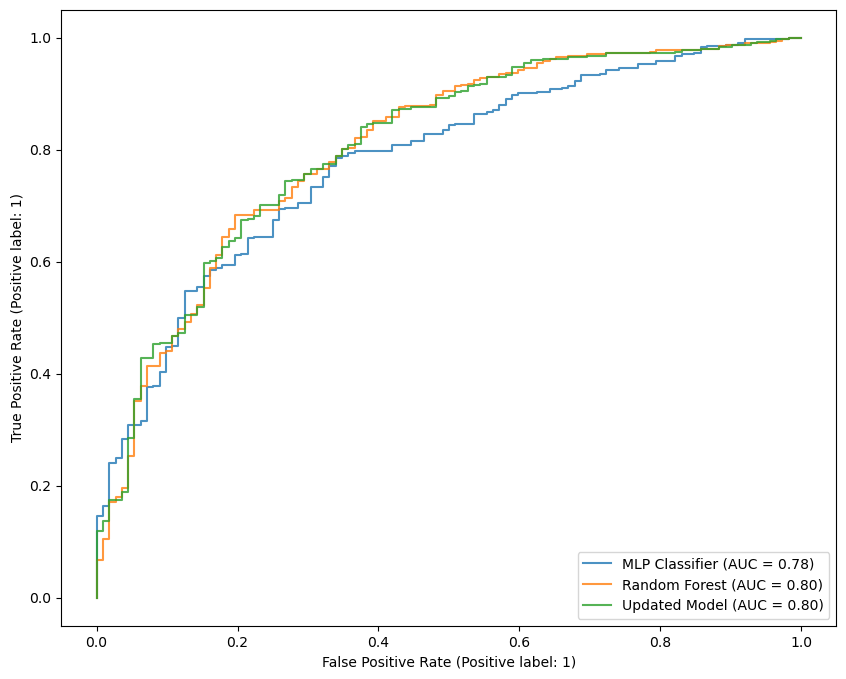

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import joblib

# Load the models from saved files
mlpc_model = joblib.load('mlpc_model.joblib')
rf_model = joblib.load('rf_model.joblib')
best_model = joblib.load('best_model.joblib')

# Set up the plot for ROC curves
fig = plt.figure(figsize=(10, 8))  # Creating a figure with specified size
ax = plt.gca()                     # Getting the current Axes instance on the current figure

# Plotting ROC Curve
RocCurveDisplay.from_estimator(mlpc_model, X_test_scaled, y_test, ax=ax, name='MLP Classifier', alpha=0.8)
RocCurveDisplay.from_estimator(rf_model, X_test_scaled, y_test, ax=ax, name='Random Forest', alpha=0.8)
RocCurveDisplay.from_estimator(best_model, X_test_scaled, y_test, ax=ax, name='Updated Model', alpha=0.8)
plt.show()


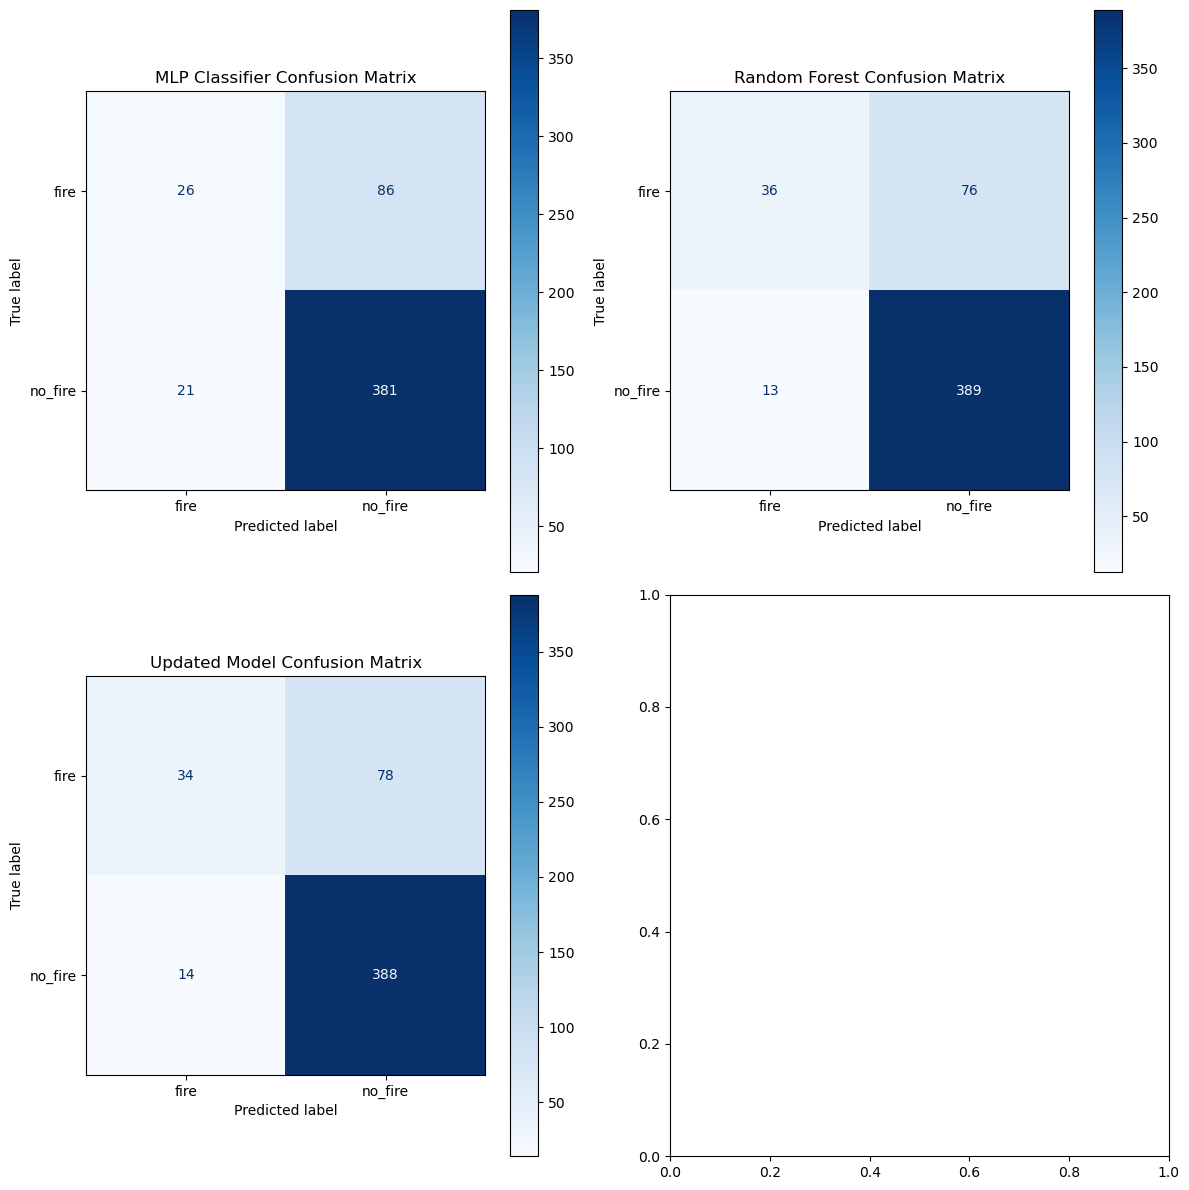

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt

# Load the models from saved files
mlpc_model = joblib.load('mlpc_model.joblib')
rf_model = joblib.load('rf_model.joblib')
best_model = joblib.load('best_model.joblib')

# Making predictions using the loaded models
y_pred_mlpc = mlpc_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_updated= best_model.predict(X_test_scaled)

# Computing confusion matrices for each model
cm_mlpc = confusion_matrix(y_test, y_pred_mlpc)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_updated = confusion_matrix(y_test, y_pred_updated)

# Setting up the subplot for displaying multiple confusion matrices
fig, ax = plt.subplots(2, 2, figsize=(9, 9))  # Creating a 2x2 grid of subplots

# Plotting confusion matrix
ConfusionMatrixDisplay(cm_mlpc, display_labels=label_encoder.classes_).plot(ax=ax[0,0], cmap='Blues')
ax[0,0].set_title('MLP Classifier Confusion Matrix')
ConfusionMatrixDisplay(cm_rf, display_labels=label_encoder.classes_).plot(ax=ax[0,1], cmap='Blues')
ax[0,1].set_title('Random Forest Confusion Matrix')
ConfusionMatrixDisplay(cm_updated, display_labels=label_encoder.classes_).plot(ax=ax[1,0], cmap='Blues')
ax[1,0].set_title('Updated Model Confusion Matrix')

plt.tight_layout()
plt.show()


### Results and Discussion

Our project aims to predict wildfires using a machine-learning approach, a task that is challenging and complex for several reasons. One major obstacle is the scarcity of datasets suitable for training. Additionally, even when datasets contain detailed records of fire events, the lack of negative instances (e.g., non-fire scenarios) complicates the training process for fire prediction.

We identified a useful dataset from Canada (accessible at https://raw.githubusercontent.com/ouladsayadyounes/WildFires/master/WildFires_DataSet.csv), which includes three key features: NDVI, LST, and "Thermal Anomalies" as an indicator of fire occurrences. However, this dataset has a critical imbalance issue, with a disproportion between fire (386 instances) and no-fire (1327 instances) data. This imbalance adds complexity to the machine learning process, necessitating meticulous preprocessing and strategic choices in model selection and tuning.

The original study **[1]** reported an accuracy of over 98% for their final training model, but details regarding their model training and parameter tuning were not provided. The article only mentioned the use of Neural Networks (NN) and Support Vector Machines (SVM) as their primary models. In our approach, we aim to reconstruct and possibly enhance their results, drawing on the knowledge acquired in class and from other open sources.

In our study, we chose Neural Networks (NN) and Random Forest (RF) as our primary models. In order to check the reliability of the model outcome provided by the reference study, we employed a Multilayer Perceptron (MLP) which aligns with the model used in the article, and also for its ability to manage nonlinear relationships and decipher complex interactions among features.

We also incorporated the Random Forest model into our analysis to determine if it could surpass the performance of the Support Vector Machine (SVM) model referenced in the study. The choice of Random Forest was motivated by its efficiency in processing high-dimensional data, its quick convergence, and the ease of hyperparameter tuning. Moreover, Random Forest is known for its robustness in handling imbalanced datasets and outliers, making it a potentially more effective choice for our study's objectives.

At this stage, we applied these machine learning models - NN and Random Forest - to our dataset without any prior tuning. The resulting outputs for both NN and Random Forest are detailed below:

MLPClassifier Accuracy: 0.6154939587775409

    MLPClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.29      0.39       112
           1       0.83      0.95      0.88       402
    accuracy                           0.80       514
    macro avg      0.71      0.62      0.63       514
    weighted avg   0.78      0.80      0.77       514


RandomForestClassifier Accuracy: 0.7085110163468373

    RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.46      0.57       112
           1       0.86      0.95      0.91       402
    accuracy                           0.85       514
    macro avg      0.80      0.71      0.74       514
    weighted avg   0.84      0.85      0.83       514

The overall accuracy of both the MLP and Random Forest models was below 70%, indicating that they are not yet effective as training models. Random Forest outperformed MLP, likely due to its superior handling of nonlinear correlations and noisy data. However, given the imbalanced nature of our dataset, it's important to consider metrics beyond overall accuracy, such as precision, recall, and the F1 score. In these aspects, MLP showed lower scores across all three metrics. Therefore, the next procedure of our study focused on improving model performance through hyperparameter tuning.


The traditional approach to selecting optimal hyperparameters involves manually adjusting each parameter and then training the model to evaluate the outcomes. This process typically requires a substantial understanding of mathematical principles, practical experience, and even a degree of intuition on the part of the researcher. In our approach, however, we adopted several techniques that allow for the determination of optimal parameters without needing to manually adjust each one individually. This strategy aims to streamline the hyperparameter selection process and potentially improve model performance more efficiently.

Initially, we employed Random Search to identify the best tuning parameters. Random Search is particularly effective for navigating large hyperparameter spaces, as it samples a fixed number of parameters from specified distributions and selects the set that yields the best performance. This approach is especially suitable for the MLP model, which has numerous hyperparameters to tune, striking a balance between efficiency and accuracy. However, it's important to note that the optimal parameter set identified by Random Search might not always be the absolute best. This limitation arises because the truly optimal parameters may not be included in the sampled distributions or might not be selected during the process. Below are the hyperparameter settings identified for both the MLP and RF models:

MLPClassifier Parameters
    
    hidden_layer_sizes: [(200, 200), (50, 50, 50), (100, 100, 100)]
    Meaning & Reason: These values represent different configurations of the neural network's hidden layers. For instance, (200, 200) means two layers with 200 neurons each. Different configurations can capture various complexities in the data. More layers or neurons can model complex relationships but may increase the risk of overfitting.
    
    activation: ['identity', 'logistic', 'tanh', 'relu']
    Meaning & Reason: These are the activation functions for the neurons. 'Identity' means no activation function (linear), 'logistic' is the sigmoid function, 'tanh' is the hyperbolic tangent function, and 'relu' is the rectified linear unit function. Each function introduces non-linearity in different ways, affecting the network's ability to learn complex patterns.
    
    alpha: Range between 10^-6 and 10^0 (1) with 10000 points.
    Meaning & Reason: This parameter controls the L2 regularization strength. A wider range of values allows the model to explore a broad spectrum from minimal to strong regularization, helping to find the right balance to combat overfitting without losing significant predictive power.

RandomForestClassifier Parameters
    
    n_estimators: Range between 50 and 450, sampled at 400 points.
    Meaning & Reason: This parameter sets the number of trees in the forest. More trees generally improve the model's performance but increase computational cost. Your range provides a wide array to determine the optimal number of trees.
    
    max_depth: Range between 2 and 15, sampled at 13 points.
    Meaning & Reason: This determines the maximum depth of each tree. A varied range allows the model to explore both shallow and deep trees, balancing between capturing sufficient complexity and avoiding overfitting.
    
    min_samples_split: Range between 2 and 15, sampled at 13 points.
    Meaning & Reason: It sets the minimum number of samples required to split a node. Higher values can prevent the model from learning overly specific patterns, thus helping to control overfitting.

    min_samples_leaf: Range between 1 and 15, sampled at 14 points.
    Meaning & Reason: This parameter sets the minimum number of samples that must be in a leaf node. Ensuring a minimum number of samples in leaf nodes helps in avoiding overfitting by not allowing the trees to grow too complex.
    
    max_features: Chosen Value: 3
    Meaning & Reason: This determines the number of features to consider when looking for the best split. Choosing a lower number (like 3) can lead to greater tree diversity, which can improve the model's robustness and generalization.


The second method we used was Grid Search. Compared with Random Search, which selects parameters randomly from specified distributions, Grid Search explores a defined range and tests every possible combination of parameters. This approach tends to be more precise and is often regarded as a thorough model tuning technique. Grid Search can be particularly effective in identifying the most optimal set of parameters, albeit at the cost of increased computational time and resources. Below are the parameter settings we established for the Grid Search:

MLPClassifier Parameters

    activation: best_params_mlpc['activation']
    Meaning & Reason: This is the activation function for the neurons. Again, you are using the best activation function found previously, focusing your fine-tuning efforts around this particular function.

    alpha: best_params_mlpc['alpha'] * (1 + np.linspace(-wp, wp, n))
    Meaning & Reason: Alpha is the L2 regularization term. Your approach multiplies the previously identified best alpha value by a range of factors linearly spaced between -12% and +12% (np.linspace(-wp, wp, n)). This method is exploring close to the previously identified best value, allowing for slight adjustments to further optimize the regularization strength.

RandomForestClassifier Parameters

    n_estimators: [int(best_params_rf['n_estimators'] * (1 + x)) for x in np.linspace(-wp, wp, n)]
    Meaning & Reason: This represents the number of trees in the forest. You are adjusting the number of trees around the previously best value, scaled by a range between -12% and +12%. This fine-tuning can help you find an even more optimal number of trees for the ensemble.

    max_depth: [int(best_params_rf['max_depth'] + x) for x in range(-2, 3)]
    Meaning & Reason: This parameter determines the maximum depth of each tree. You are exploring depths around the previously best value, allowing for a variation of plus or minus 2. This is to refine the depth for better balance between model complexity and risk of overfitting.

    min_samples_split: [best_params_rf['min_samples_split'] + x for x in range(-1, 2)]
    Meaning & Reason: This sets the minimum number of samples required to split an internal node. Your values are variations around the previously found best parameter, adjusting by -1, 0, or +1, to fine-tune how the tree nodes split.

    min_samples_leaf: [best_params_rf['min_samples_leaf'] + x for x in range(-1, 2)]
    Meaning & Reason: This parameter sets the minimum number of samples that must be in a leaf node. Similar to min_samples_split, you are fine-tuning around the best value found, adjusting slightly to potentially improve the model's ability to generalize.

The hyperparameter training process is computationally intensive, which partly explains why we limited our study to just two models. These models, MLP and RF, underwent an hour of trainingon the Colab pro using V100 GPU platform. The prediction results for both MLP and RF are shown below:

MLPClassifier Accuracy: 0.791828793774319

    MLPClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.23      0.33       112
           1       0.82      0.95      0.88       402

    accuracy                           0.79       514
    macro avg      0.68      0.59      0.60       514
    weighted avg   0.76      0.79      0.76       514


RandomForestClassifier Accuracy: 0.8268482490272373

    RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.32      0.45       112
           1       0.84      0.97      0.90       402

    accuracy                           0.83       514
    macro avg      0.79      0.64      0.67       514
    weighted avg   0.81      0.83      0.80       514

As indicated in the report table, both the MLP and Random Forest models have shown improved performance. However, the recall and F1 scores for both models are still not at satisfactory levels. This issue could be attributed to the inherent imbalance in the dataset between fire and no-fire instances. To further enhance our model's accuracy, we have decided to implement an ensemble classifier in the next step, aiming to find the best model configuration that effectively addresses this challenge.



The ensemble method is typically employed to boost predictive accuracy by leveraging the strengths of various models to produce an optimal final model. One key technique is the Voting classifier, which aggregates the predictions from different models and determines the final outcome based on a majority vote. This vote can be 'hard' (relying on the most common class label) or 'soft' (taking into account class probabilities). Another approach, Stacking, involves training an additional model to combine the predictions of several base models. This process effectively trains the model on how to optimally combine their outputs. Both strategies benefit from the diversity of the base models, often leading to enhanced accuracy and robustness compared to single models. Below, we present the results of various model combinations:

Accuracy: 0.8210116731517509

    Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.30      0.42       112
           1       0.83      0.97      0.89       402

    accuracy                           0.82       514
    macro avg      0.77      0.63      0.66       514
    weighted avg   0.81      0.82      0.79       514

The final outcome did not show a significant improvement over previous results. This can be attributed to several potential factors. Firstly, the base model performances were suboptimal. Despite enhancements through hyperparameter tuning, both the MLP and random forest models did not achieve a satisfactory level of accuracy (e.g., 90%). Additionally, our application was limited to only two models. This restriction reduced the diversity of models in the ensemble, which is crucial for enriching the ensemble classifier. The most pressing issue, however, relates to class imbalance. The models tend to lean towards predicting the dominant class, thus reducing overall performance. Upon completing the model training, we assessed our data using Confusion Matrices and produced ROC curves for each model to evaluate their performance.

#### Future Work

Based on the knowledge and challenges encountered in our current project report, we recognize the necessity to undertake multiple strategic paths in our future work. Our next steps are strategically planned to overcome existing limitations and expand the scope of our research, aiming to improve the accuracy and reliability of our wildfire prediction models. This enhancement will be achieved by employing a more balanced and diverse dataset, incorporating additional machine-learning methods, and making further improvements to the ensemble classifier. Here is an outline of how we intend to progress from our current findings to future developments and explorations.

The current dataset's limitation lies in its skewed distribution of fire and no-fire cases, improvement should be addressed by incorporating more balanced data. To further enrich the dataset, it should incorporate not just NDVI and LST but also additional features that impact wildfire occurrences, such as relative humidity and wind speed, both critical in understanding fire behavior. By broadening the dataset to encompass data from various Canadian locations and extending the data collection period, we can achieve a dataset that is both more representative and varied. Such an expansion will not only enhance the model's reliability but also yield more comprehensive insights into the spatial and temporal patterns of wildfires.

Another essential aspect of our future work to improve the dataset will be advanced feature engineering. This will involve creating new features that can better capture the complexities of wildfires, such as interactions between different environmental factors. We will also explore dimensional reduction techniques to identify the most impactful features and reduce the noise in the data. Techniques like Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE) might be particularly useful in this regard. Additionally, we plan to implement more sophisticated methods for handling missing or inconsistent data to enhance the quality and reliability of our dataset.

To improve the accuracy and robustness of our predictive models,  alternative machine learning methods should be explored. These include the Gaussian Naive Bayes Classifier, known for its simplicity and effectiveness in handling large datasets; the Support Vector Classifier, which is particularly useful in high-dimensional spaces; and the Gradient Boosting Classifier, renowned for its precision and ability to handle imbalanced data. These methods, with their unique strengths and approaches, may offer improved performance over our current models and provide a more detailed understanding of the factors influencing wildfire occurrences.

Our future research will also involve refining our approach to ensemble classifiers. Given the modest improvements seen with our current ensemble methods, we aim to adjust and optimize these strategies. This will include experimenting with different combinations of base models, exploring weighted voting systems for more detailed majority voting in ensemble methods, and fine-tuning the stacking approach to better leverage the strengths of each base model. The objective is to create an ensemble classifier that not only improves accuracy but also addresses the challenges posed by the dataset's imbalance.








### Reference
[1] Y. O. Sayad, H. Mousannif, and H. Al Moatassime, “Predictive modeling of wildfires: A new dataset and machine learning approach,” Fire Safety Journal, vol. 104, pp. 130–146, Mar. 2019, doi: https://doi.org/10.1016/j.firesaf.2019.01.006.

[2] “Vegetation indices and their interpretation: NDVI, GNDVI, MSAVI2, NDRE, and NDWI,” Auravant. https://www.auravant.com/en/articles/precision-agriculture/vegetation-indices-and-their-interpretation-ndvi-gndvi-msavi2-ndre-and-ndwi/

[3] Cheng Xiang, S. Q. Ding and Tong Heng Lee, "Geometrical interpretation and architecture selection of MLP," in IEEE Transactions on Neural Networks, vol. 16, no. 1, pp. 84-96, Jan. 2005, doi: 10.1109/TNN.2004.836197.

[4] C. Vens and F. Costa, "Random Forest Based Feature Induction," 2011 IEEE 11th International Conference on Data Mining, Vancouver, BC, Canada, 2011, pp. 744-753, doi: 10.1109/ICDM.2011.121.

[5] “Grid Search, Random Search, Genetic Algorithm: A Big Comparison for NAS,” ar5iv. https://ar5iv.labs.arxiv.org/html/1912.06059

[6] Sigletos, G., Paliouras, G., Spyropoulos, C. D., Hatzopoulos, M., & Cohen, W. (2005). Combining Information Extraction Systems Using Voting and Stacked Generalization. Journal of Machine Learning Research, 6(11).